<a href="https://colab.research.google.com/github/shpotes/image-classification/blob/master/playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
%cd /content/
!rm -rf image-classification
!git clone https://github.com/shpotes/image-classification/
%cd image-classification
!pip install -q -r requirement.txt

/content
Cloning into 'image-classification'...
remote: Enumerating objects: 3888, done.
remote: Counting objects: 100% (3888/3888), done.
remote: Compressing objects: 100% (2436/2436), done.
remote: Total 3888 (delta 1500), reused 3823 (delta 1444), pack-reused 0
Receiving objects: 100% (3888/3888), 7.37 MiB | 8.58 MiB/s, done.
Resolving deltas: 100% (1500/1500), done.
/content/image-classification


In [26]:
import json

import pandas as pd
import tensorflow as tf
import numpy as np

from model.dataset import *
from model.model import *

%load_ext autoreload
%autoreload 2

with open('config.json') as raw_config:
    config = json.load(raw_config)
    
train_source = build_source_from_metadata(pd.read_csv(config['model']['metadata_path']),
                                        config['model']['data_path'], 'train')
train_source[:5]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[('data/train/70f02e4f45584650b12769b5b3539bc1.jpg', 1),
 ('data/train/1967c59c2fec4a74ac7cccd0eaa1d272.jpg', 1),
 ('data/train/1df22c4c9c654985aabd7367a2e81aed.jpg', 2),
 ('data/train/2fd2f4e10ba8411e91fc555210697510.jpg', 3),
 ('data/train/ebc8711b5b96443e85012bfd00f147f4.jpg', 2)]

# Overfit single batch

In [27]:
model = ResNet(config, overfit_mode=True)
print(model)

ResNet

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 230, 230, 3)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 64)      9472      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
res_block_6 (ResBlock)       (None, 56, 56, 64)        74240     
_________________________________________________________________
res_block_7 (ResBlock)       (None, 56, 56, 64)        74240     
_________________________________________________________________
res_block_8 (ResBlock)       (None, 56, 56, 12

In [28]:
hist = model.train()

W0708 00:15:04.213178 140016027654016 training_utils.py:1436] Expected a shuffled dataset but input dataset `x` is not shuffled. Please invoke `shuffle()` on input dataset.
W0708 00:15:04.362179 140016027654016 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
1/1 [==============================] - 14s 14s/step - loss: 1.9895 - accuracy: 0.2000 - val_loss: 1.6035 - val_accuracy: 0.2969
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 1.5597 - accuracy: 0.2000 - val_loss: 1.6059 - val_accuracy: 0.2969
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 1.2572 - accuracy: 0.6000 - val_loss: 1.6071 - val_accuracy: 0.2969
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 1.0630 - accuracy: 0.8000 - val_loss: 1.6075 - val_accuracy: 0.2951
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 0.9513 - accuracy: 1.0000 - val_loss: 1.6073 - val_accuracy: 0.2951
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.8655 - accuracy: 1.0000 - val_loss: 1.6069 - val_accuracy: 0.3807
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.7901 - accuracy: 1.0000 - val_loss: 1.6063 - val_accuracy: 0.4390
Epoch 8/20
1/1 [=======================

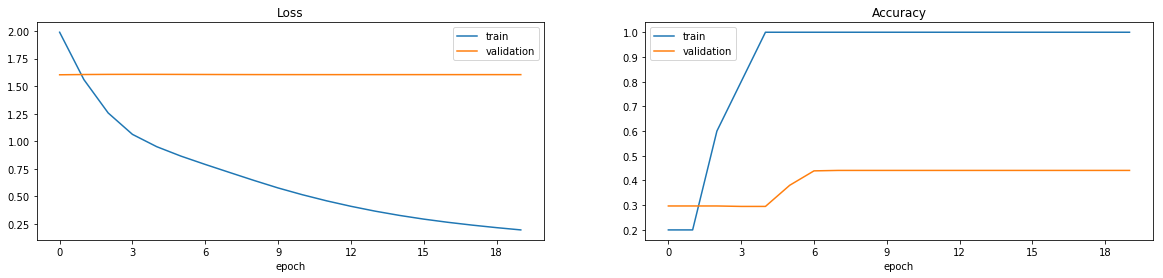

In [29]:
from matplotlib.ticker import MaxNLocator

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.set_figwidth(20)

ax1.plot(hist.history['loss'], label='train')
ax1.plot(hist.history['val_loss'], label='validation')
ax1.legend()
ax1.set_xlabel('epoch')
ax1.set_title('Loss')


ax2.plot(hist.history['accuracy'], label='train')
ax2.plot(hist.history['val_accuracy'], label='validation')
ax2.legend()
ax2.set_title('Accuracy')
ax2.set_xlabel('epoch')

plt.show()

In [30]:
model.evaluate()

train
1/1 [==============================] - 0s 28ms/step - loss: 1.6079 - accuracy: 0.2000
test
106/106 [==============================] - 2s 18ms/step - loss: 1.6048 - accuracy: 0.4348


# Whole data

In [32]:
tf.keras.backend.clear_session()
model = VGG16(config, overfit_mode=False)
print(model)

VGG16

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256) 

In [33]:
hist = model.train()

W0708 00:16:44.164059 140016027654016 training_utils.py:1436] Expected a shuffled dataset but input dataset `x` is not shuffled. Please invoke `shuffle()` on input dataset.


Epoch 1/60
215/215 [==============================] - 62s 290ms/step - loss: 1.3316 - accuracy: 0.4533 - val_loss: 1.2832 - val_accuracy: 0.4408
Epoch 2/60
215/215 [==============================] - 52s 244ms/step - loss: 1.2207 - accuracy: 0.4992 - val_loss: 1.0570 - val_accuracy: 0.5811
Epoch 3/60
215/215 [==============================] - 53s 249ms/step - loss: 1.0422 - accuracy: 0.6128 - val_loss: 0.8992 - val_accuracy: 0.6776
Epoch 4/60
215/215 [==============================] - 53s 248ms/step - loss: 0.8865 - accuracy: 0.6751 - val_loss: 0.7875 - val_accuracy: 0.7177
Epoch 5/60
215/215 [==============================] - 53s 248ms/step - loss: 0.7799 - accuracy: 0.7132 - val_loss: 0.7516 - val_accuracy: 0.7432
Epoch 6/60
215/215 [==============================] - 53s 249ms/step - loss: 0.6854 - accuracy: 0.7510 - val_loss: 0.7199 - val_accuracy: 0.7541
Epoch 7/60
215/215 [==============================] - 54s 249ms/step - loss: 0.5997 - accuracy: 0.7837 - val_loss: 0.7011 - val_ac

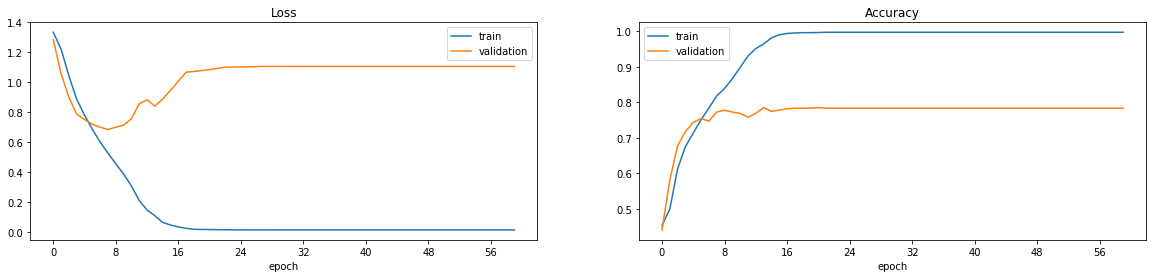

In [34]:
from matplotlib.ticker import MaxNLocator

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.set_figwidth(20)

ax1.plot(hist.history['loss'], label='train')
ax1.plot(hist.history['val_loss'], label='validation')
ax1.legend()
ax1.set_xlabel('epoch')
ax1.set_title('Loss')


ax2.plot(hist.history['accuracy'], label='train')
ax2.plot(hist.history['val_accuracy'], label='validation')
ax2.legend()
ax2.set_title('Accuracy')
ax2.set_xlabel('epoch')

plt.show()

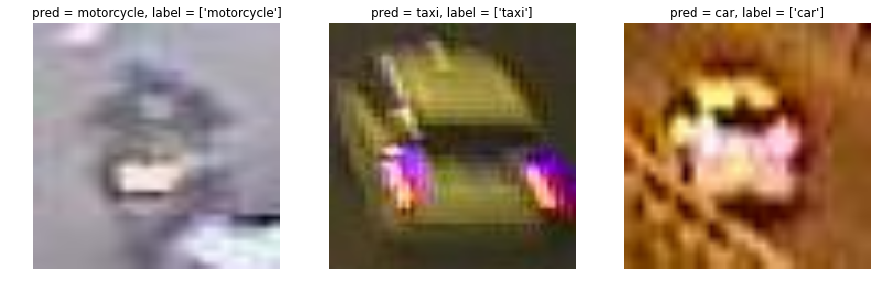

In [35]:
imshow_with_predictions(model, next(iter(model.test_data)), show_label=True, label_map=config['model']['labels'])

In [36]:
model.evaluate()

train
215/215 [==============================] - 16s 75ms/step - loss: 0.0167 - accuracy: 0.9969
test
45/45 [==============================] - 4s 91ms/step - loss: 1.5851 - accuracy: 0.7599


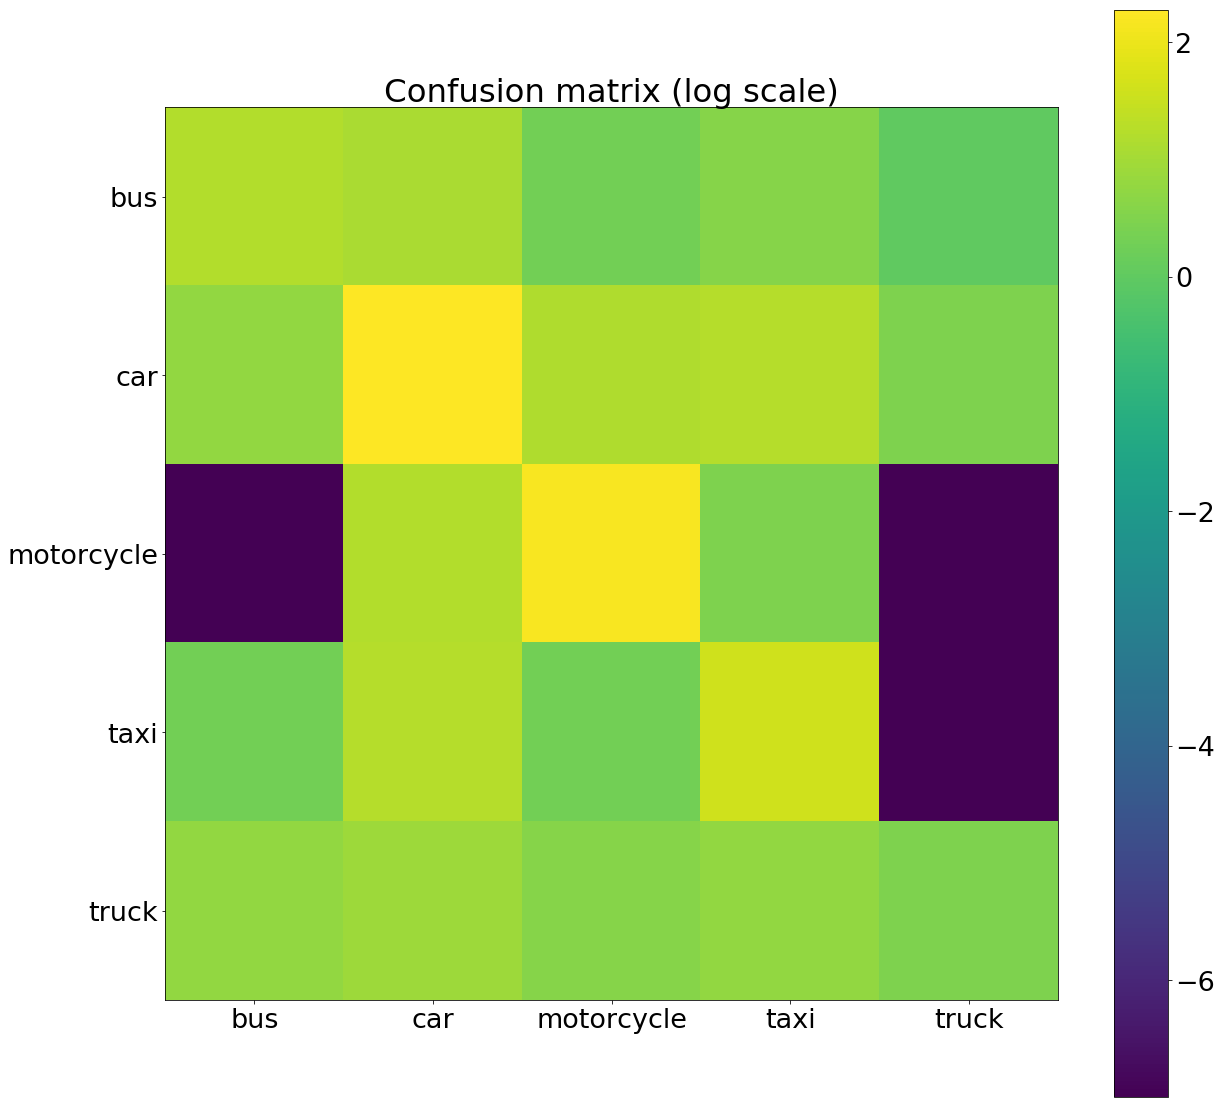

In [37]:
plt.rcParams.update({'font.size': 27})
plt.figure(figsize=(20, 20))
plt.imshow(np.log10(compute_confusion_matrix(model).numpy() + 0.0000001))
plt.yticks(np.arange(5), labels=config['model']['labels'])
plt.xticks(np.arange(5), labels=config['model']['labels'])
plt.title('Confusion matrix (log scale)')
plt.colorbar()